In [3]:
import zarr
import xarray as xr
import glob
import os

output_dir = './data'
zarr_store = zarr.open_group(path='/home/def/Backup/Uni/Magistrale/1/Second semester/Air-Quality-Monitoring-Platform/db/' + 'Padre_Pio' + '.zarr', mode='w')
files = glob.glob(output_dir + '/*.nc')
for file in files:

    timestep_db = xr.open_dataset(file, group='PRODUCT')
    timestep_db.to_zarr(zarr_store, mode='a', consolidated=True)
    os.remove(file)

    zarr_store.close()


KeyError: 'home/def/Backup/Uni/Magistrale/1/Second semester/Air-Quality-Monitoring-Platform/db/Padre_Pio.zarr/.zgroup/.zarray'

In [21]:
import zarr
import xarray as xr
import glob
import os

output_dir = './data'
#zarr_store = zarr.open_group(os.path.join('./db', 'Padre_Pio.zarr'), mode='w')
files = glob.glob(output_dir + '/*.nc')
for file in files:
    timestep_db = xr.open_dataset(file, group='PRODUCT')
    timestep_db.to_zarr(os.path.join('./db', 'Padre_Pio.zarr'), mode='a', consolidated=True, append_dim='scanline')
    os.remove(file)






sono entrato
sono entrato2
sono entrato3
sono uscito
sono entrato
sono entrato2
sono entrato3
sono uscito
sono entrato
sono entrato2
sono entrato3
sono uscito
sono entrato
sono entrato2
sono entrato3
sono uscito
sono entrato
sono entrato2
sono entrato3
sono uscito
sono entrato
sono entrato2
sono entrato3
sono uscito
sono entrato
sono entrato2
sono entrato3
sono uscito
sono entrato
sono entrato2
sono entrato3
sono uscito
sono entrato
sono entrato2
sono entrato3
sono uscito
sono entrato
sono entrato2
sono entrato3
sono uscito
sono entrato
sono entrato2
sono entrato3
sono uscito
sono entrato
sono entrato2
sono entrato3
sono uscito


AttributeError: 

In [3]:
import xarray as xr
import os

db = xr.open_zarr(os.path.join('./db', 'L2__CH4___TEST'), consolidated=True)

/home/def/Backup/Uni/Magistrale/1/Second semester/Air-Quality-Monitoring-Platform/venv/lib/python3.11/site-packages/xarray/coding/times.py:254: RuntimeWarning: invalid value encountered in cast
  flat_num_dates_ns_int = (flat_num_dates * _NS_PER_TIME_DELTA[delta]).astype(


In [4]:
db

<xarray.Dataset>
Dimensions:                              (corner: 4, time: 27, scanline: 4174,
                                          ground_pixel: 215, layer: 12,
                                          level: 13)
Coordinates:
  * corner                               (corner) float64 0.0 1.0 2.0 3.0
  * ground_pixel                         (ground_pixel) float64 0.0 ... 214.0
    latitude                             (time, scanline, ground_pixel) float32 dask.array<chunksize=(1, 4174, 215), meta=np.ndarray>
  * layer                                (layer) float64 0.0 1.0 ... 10.0 11.0
  * level                                (level) float64 0.0 1.0 ... 11.0 12.0
    longitude                            (time, scanline, ground_pixel) float32 dask.array<chunksize=(1, 4174, 215), meta=np.ndarray>
  * scanline                             (scanline) float64 0.0 ... 4.173e+03
  * time                                 (time) datetime64[ns] 2023-05-15 ......
Data variables:
    delta_time                           (time, scanline) datetime64[ns] dask.array<chunksize=(14, 4174), meta=np.ndarray>
    methane_mixing_ratio                 (time, scanline, ground_pixel) float32 dask.array<chunksize=(1, 4174, 215), meta=np.ndarray>
    methane_mixing_ratio_bias_corrected  (time, scanline, ground_pixel) float32 dask.array<chunksize=(1, 4174, 215), meta=np.ndarray>
    methane_mixing_ratio_precision       (time, scanline, ground_pixel) float32 dask.array<chunksize=(1, 4174, 215), meta=np.ndarray>
    qa_value                             (time, scanline, ground_pixel) float32 dask.array<chunksize=(1, 4174, 215), meta=np.ndarray>
    time_utc                             (time, scanline) object dask.array<chunksize=(7, 2087), meta=np.ndarray>

In [10]:
net = xr.open_dataset("./data/S5P_OFFL_L2__CH4____20230514T204139_20230514T222310_28935_03_020500_20230516T125138.nc", group='PRODUCT')
net.to_netcdf("./test/S5P_OFFL_L2__CH4____20230514T204139_20230514T222310_28935_03_020500_20230516T125138.nc", mode='w', encoding={'time_utc': {'dtype': 'S1'}})
net = xr.open_dataset("./test/S5P_OFFL_L2__CH4____20230514T204139_20230514T222310_28935_03_020500_20230516T125138.nc")
net

<xarray.Dataset>
Dimensions:                              (scanline: 4172, ground_pixel: 215,
                                          time: 1, corner: 4, layer: 12,
                                          level: 13)
Coordinates:
  * scanline                             (scanline) float64 0.0 ... 4.171e+03
  * ground_pixel                         (ground_pixel) float64 0.0 ... 214.0
  * time                                 (time) datetime64[ns] 2023-05-14
  * corner                               (corner) float64 0.0 1.0 2.0 3.0
  * layer                                (layer) float64 0.0 1.0 ... 10.0 11.0
  * level                                (level) float64 0.0 1.0 ... 11.0 12.0
    latitude                             (time, scanline, ground_pixel) float32 ...
    longitude                            (time, scanline, ground_pixel) float32 ...
Data variables:
    delta_time                           (time, scanline) datetime64[ns] ...
    time_utc                             (time, scanline) object ...
    qa_value                             (time, scanline, ground_pixel) float32 ...
    methane_mixing_ratio                 (time, scanline, ground_pixel) float32 ...
    methane_mixing_ratio_precision       (time, scanline, ground_pixel) float32 ...
    methane_mixing_ratio_bias_corrected  (time, scanline, ground_pixel) float32 ...

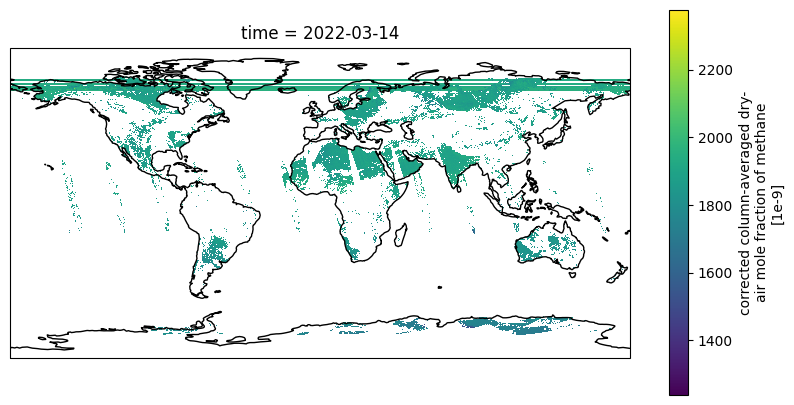

In [24]:
import cartopy.crs as ccrs
from matplotlib import pyplot as plt

fig = plt.figure(figsize=(10, 5))
ax = plt.axes(projection=ccrs.PlateCarree())

db.methane_mixing_ratio_bias_corrected[0].plot.pcolormesh(ax=ax, x='longitude', y='latitude', add_colorbar=True)

ax.set_global(); ax.coastlines()
plt.show()

In [5]:
import xarray as xr
import os

db = xr.open_zarr(os.path.join('./db', 'L2__CH4___TEST'), consolidated=True)
db

/home/def/Backup/Uni/Magistrale/1/Second semester/Air-Quality-Monitoring-Platform/venv/lib/python3.11/site-packages/xarray/coding/times.py:254: RuntimeWarning: invalid value encountered in cast
  flat_num_dates_ns_int = (flat_num_dates * _NS_PER_TIME_DELTA[delta]).astype(


<xarray.Dataset>
Dimensions:                              (corner: 4, time: 27, scanline: 4174,
                                          ground_pixel: 215, layer: 12,
                                          level: 13)
Coordinates:
  * corner                               (corner) float64 0.0 1.0 2.0 3.0
  * ground_pixel                         (ground_pixel) float64 0.0 ... 214.0
    latitude                             (time, scanline, ground_pixel) float32 dask.array<chunksize=(1, 4174, 215), meta=np.ndarray>
  * layer                                (layer) float64 0.0 1.0 ... 10.0 11.0
  * level                                (level) float64 0.0 1.0 ... 11.0 12.0
    longitude                            (time, scanline, ground_pixel) float32 dask.array<chunksize=(1, 4174, 215), meta=np.ndarray>
  * scanline                             (scanline) float64 0.0 ... 4.173e+03
  * time                                 (time) datetime64[ns] 2023-05-15 ......
Data variables:
    delta_time                           (time, scanline) datetime64[ns] dask.array<chunksize=(14, 4174), meta=np.ndarray>
    methane_mixing_ratio                 (time, scanline, ground_pixel) float32 dask.array<chunksize=(1, 4174, 215), meta=np.ndarray>
    methane_mixing_ratio_bias_corrected  (time, scanline, ground_pixel) float32 dask.array<chunksize=(1, 4174, 215), meta=np.ndarray>
    methane_mixing_ratio_precision       (time, scanline, ground_pixel) float32 dask.array<chunksize=(1, 4174, 215), meta=np.ndarray>
    qa_value                             (time, scanline, ground_pixel) float32 dask.array<chunksize=(1, 4174, 215), meta=np.ndarray>
    time_utc                             (time, scanline) object dask.array<chunksize=(7, 2087), meta=np.ndarray>

In [7]:
db_sel = db.sel(time='2023-05-14T21:00:00.000000000', method="nearest")

InvalidIndexError: Reindexing only valid with uniquely valued Index objects